In [17]:
from utils.data_processing import extract_eeg_data, segment_data, train_test_val_split, dict_to_arr
from utils.labels import get_stai_labels, compute_stai_scores
from utils.valid_recordings import get_valid_recordings
import utils.variables as var
import os
import numpy as np



In [19]:
scores = compute_stai_scores()
scores

,SubjectNo,D1Y1,D2Y1,J1Y1,J2Y1
0,1,26,30,29,31
1,2,38,41,26,34
2,3,58,56,36,35
3,4,40,45,24,24
4,5,25,31,38,37
5,6,49,58,0,0
6,7,56,50,28,28
7,8,46,37,23,27
8,9,41,47,27,22
9,10,37,20,23,21


In [2]:
valid_recordings = get_valid_recordings('raw')
labels = get_stai_labels(valid_recordings, cutoff=40)

data = extract_eeg_data(valid_recordings=valid_recordings, data_type='raw')
#segmented_data, segmented_labels = segment_data(data, labels, epoch_duration=5)

#segmented_data['P001_S001_001_epoch0']

Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ..

ERROR:root:Failed to read data for recording P006_S002_001
ERROR:root:Failed to read data for recording P006_S002_002


Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ..

ERROR:root:Failed to read data for recording P028_S002_001
ERROR:root:Failed to read data for recording P028_S002_002


Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ..

In [3]:
#len(segmented_data['P001_S001_001_epoch0'])
segmented_data, segmented_labels = segment_data(data, labels, epoch_duration=5)
len(segmented_data['P001_S001_001_epoch0'][0])

Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 1251 original time points ...
1 bad epochs dropped
<Info | 7 non-empty values
 bads: []
 ch_names: F4, Fp2, C3, FC6, O1, Oz, FT9, T8
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 events and 1251 original time points ...
1 bad epochs dropped
<Info | 7 non-empty values
 bads: []
 ch_names: F4, Fp2, C3, FC6, O1, Oz, FT9, T8
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 60 eve

1251

In [4]:
#segmented_data.keys()
train_data, train_labels, test_data, test_labels, val_data, val_labels = train_test_val_split(segmented_data, segmented_labels)


subjects:  ['P007', 'P027', 'P023', 'P004', 'P001', 'P019', 'P013', 'P025', 'P010', 'P006', 'P026', 'P002', 'P016', 'P018', 'P021', 'P028', 'P012', 'P005', 'P017', 'P022', 'P024', 'P003'] 
 subjects test:  ['P011', 'P020', 'P015', 'P014', 'P008', 'P009'] 
 subjects train:  ['P016', 'P006', 'P019', 'P022', 'P018', 'P002', 'P013', 'P027', 'P004', 'P028', 'P003', 'P024', 'P007', 'P017', 'P026', 'P023'] 
 subjects val:  ['P021', 'P005', 'P025', 'P010', 'P001', 'P012']


In [5]:
print(train_data.keys())
print(len(train_data['P016_S001_001_epoch1'][0]))
#len(train_data['P001_S001_001_epoch0'][0])
#len(test_data)
print(len(train_labels))
len(train_data)

dict_keys(['P016_S001_001_epoch0', 'P016_S001_001_epoch1', 'P016_S001_001_epoch2', 'P016_S001_001_epoch3', 'P016_S001_001_epoch4', 'P016_S001_001_epoch5', 'P016_S001_001_epoch6', 'P016_S001_001_epoch7', 'P016_S001_001_epoch8', 'P016_S001_001_epoch9', 'P016_S001_001_epoch10', 'P016_S001_001_epoch11', 'P016_S001_001_epoch12', 'P016_S001_001_epoch13', 'P016_S001_001_epoch14', 'P016_S001_001_epoch15', 'P016_S001_001_epoch16', 'P016_S001_001_epoch17', 'P016_S001_001_epoch18', 'P016_S001_001_epoch19', 'P016_S001_001_epoch20', 'P016_S001_001_epoch21', 'P016_S001_001_epoch22', 'P016_S001_001_epoch23', 'P016_S001_001_epoch24', 'P016_S001_001_epoch25', 'P016_S001_001_epoch26', 'P016_S001_001_epoch27', 'P016_S001_001_epoch28', 'P016_S001_001_epoch29', 'P016_S001_001_epoch30', 'P016_S001_001_epoch31', 'P016_S001_001_epoch32', 'P016_S001_001_epoch33', 'P016_S001_001_epoch34', 'P016_S001_001_epoch35', 'P016_S001_001_epoch36', 'P016_S001_001_epoch37', 'P016_S001_001_epoch38', 'P016_S001_001_epoch39',

3540

In [8]:
train_data_arr = dict_to_arr(train_data)
test_data_arr = dict_to_arr(test_data)
val_data_arr = dict_to_arr(val_data)

In [9]:
print(train_data_arr.shape)


(3540, 8, 1251)


In [10]:
train_labels_arr = np.reshape(np.array(list(train_labels.values())), (len(train_data),1))
test_labels_arr = np.reshape(np.array(list(test_labels.values())), (len(test_data),1))
val_labels_arr = np.reshape(np.array(list(val_labels.values())), (len(val_data),1))

#train_labels_arr = np.reshape(np.array(list(train_labels.values())), (len(train_data)), 1)
#test_labels_arr = np.reshape(np.array(list(test_labels.values())), (len(test_data)), 1)
#val_labels_arr = np.reshape(np.array(list(val_labels.values())), (len(val_data)), 1)

In [11]:
print(f"Shape of train data set: {train_data_arr.shape}")
print(f"Shape of train labels set: {train_labels_arr.shape}")

print(f"Shape of validation data set: {val_data_arr.shape}")
print(f"Shape of validation labels set: {val_labels_arr.shape}")

print(f"Shape of test data set: {test_data_arr.shape}")
print(f"Shape of test labels set: {test_labels_arr.shape}")


Shape of train data set: (3540, 8, 1251)
Shape of train labels set: (3540, 1)
Shape of validation data set: (1416, 8, 1251)
Shape of validation labels set: (1416, 1)
Shape of test data set: (1416, 8, 1251)
Shape of test labels set: (1416, 1)


In [12]:
from classifiers import EEGNet_classifier

Epoch 1/300

Epoch 1: val_loss improved from inf to 0.66399, saving model to /tmp/checkpoint.h5
56/56 - 5s - loss: 0.5654 - accuracy: 0.7164 - val_loss: 0.6640 - val_accuracy: 0.6250 - 5s/epoch - 89ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 0.66399
56/56 - 4s - loss: 0.4549 - accuracy: 0.7548 - val_loss: 0.7089 - val_accuracy: 0.6250 - 4s/epoch - 77ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 0.66399
56/56 - 4s - loss: 0.3956 - accuracy: 0.7980 - val_loss: 0.8550 - val_accuracy: 0.6250 - 4s/epoch - 77ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 0.66399
56/56 - 4s - loss: 0.3396 - accuracy: 0.8489 - val_loss: 0.9854 - val_accuracy: 0.6250 - 4s/epoch - 77ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 0.66399
56/56 - 4s - loss: 0.3001 - accuracy: 0.8808 - val_loss: 1.1059 - val_accuracy: 0.6250 - 4s/epoch - 77ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 0.66399
56/56 - 4s - loss: 0.2768 - accuracy: 0.8879 - val_los

/Users/idaandreassen/opt/anaconda3/envs/mne/lib/python3.9/site-packages/pyriemann/utils/viz.py:24: RuntimeWarning: invalid value encountered in true_divide
  cm = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


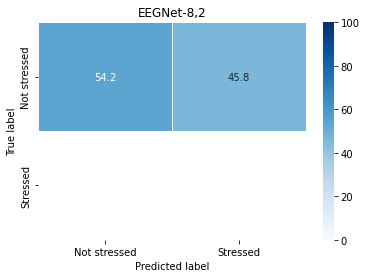

In [13]:
probs_eeg = EEGNet_classifier(train_data_arr, test_data_arr, val_data_arr, train_labels_arr, test_labels_arr, val_labels_arr)